In [1]:
import zipfile
import json
import pickle 
import chardet
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer,  make_column_transformer

In [2]:
def wrangle(filename):
    # Load the ZIP compressed CSV file with latin-1 encoding
    df = pd.read_csv(filename, compression='zip', encoding='latin-1')
    return df

In [9]:
import os
print(os.getcwd())

C:\Users\ADMIN\EarlyCare


In [3]:
df = wrangle("Data/Liver Patient Dataset (LPD)_train.csv.zip")
print(df.shape)
df.head()

(30691, 11)


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [4]:
mask=df["Result"]==2
df[mask].head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
12,64.0,Male,0.9,0.3,310.0,61.0,58.0,7.0,3.4,0.90,2
15,25.0,Male,0.6,0.1,183.0,91.0,53.0,5.5,2.3,0.70,2
17,33.0,Male,1.6,0.5,165.0,15.0,23.0,7.3,3.5,0.92,2
24,63.0,Male,0.9,0.2,194.0,52.0,45.0,6.0,3.9,1.85,2


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4   Alkphos Alkaline Phosphotase          29895 non-null  float64
 5   Sgpt Alamine Aminotransferase         30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8   ALB Albumin                           30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [7]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
Alkphos Alkaline Phosphotase            796
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [9]:
df["Result"].value_counts()

Result
1    21917
2     8774
Name: count, dtype: int64

In [10]:
target="Result"
X=df.drop(columns=target)
y=df[target]
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (30691, 10)
y shape: (30691,)


In [13]:
acc_baseline=y.value_counts(normalize=True).max()
print("Baseline Accuracy:",round(acc_baseline,4))

Baseline Accuracy: 0.7141


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (24552, 10) (24552,)
Test shape: (6139, 10) (6139,)


In [12]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:",X_train_over.shape)
X_train_over.head()

X_train_over shape: (35066, 10)


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
0,28.0,Male,0.7,0.1,162.0,52.0,41.0,5.2,2.5,0.9
1,42.0,Female,1.7,0.7,859.0,89.0,48.0,6.0,3.0,1.0
2,70.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.9
3,60.0,Male,2.2,0.8,209.0,25.0,20.0,8.0,4.0,1.0
4,26.0,Male,2.6,1.2,236.0,131.0,90.0,5.4,2.6,0.9


In [14]:
# Identify column types from already split X_train
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [15]:
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']
Categorical features: ['Gender of the patient']


In [16]:
preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numeric_features),
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False)), categorical_features)
)

In [17]:
clf=make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42)
)

In [18]:
params = {
    "randomforestclassifier__max_depth": [None, 20, 30, 40],
    "randomforestclassifier__n_estimators": [100, 200, 300],
    "randomforestclassifier__min_samples_split": [2, 5, 10],
    "randomforestclassifier__max_features": ['sqrt', 'log2']
}

In [19]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [20]:
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age '
                                                                          'of '
                                                                          'the '
                                                                          'patient',
                                                                          'Total '
                                                                          'Bilirubin',
                                                                          'Direct '
                                                                          'Bilirubin',
                                                                          'Alkphos '
                                                                          'Alkaline '
                                                                          'Phosphotase',
                                                                          'Sgpt '
                                                                          'Alamine '
                                                                          'Aminotransferase',
                                                                          'Sg...
                                                                                                        sparse_output=False))]),
                                                                         ['Gender '
                                                                          'of '
                                                                          'the '
                                                                          'patient'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 20, 30,
                                                               40],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2'],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             verbose=1)

In [21]:
model.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__n_estimators': 300}

In [30]:
convert=pd.read_excel("Data/test.csv.xlsx",header=None)
convert.head()

,0,1,2,3,4,5,6,7,8,9
0,66,Female,0.9,0.2,210,35,32,8.0,3.9,0.9
1,50,Male,9.4,5.2,268,21,63,6.4,2.8,0.8
2,42,Female,3.5,1.6,298,68,200,7.1,3.4,0.9
3,65,Male,1.7,0.8,315,12,38,6.3,2.1,0.5
4,22,Male,3.3,1.5,214,54,152,5.1,1.8,0.5


In [32]:
proper_column_names = ['Age of the patient',
 'Gender of the patient',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Alkphos Alkaline Phosphotase',
 'Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'Total Protiens',
 'ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio']

In [33]:
convert.columns = proper_column_names

In [34]:
convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    2110 non-null   int64  
 1   Gender of the patient                 2110 non-null   object 
 2   Total Bilirubin                       2110 non-null   float64
 3   Direct Bilirubin                      2110 non-null   float64
 4   Alkphos Alkaline Phosphotase          2110 non-null   int64  
 5   Sgpt Alamine Aminotransferase         2110 non-null   int64  
 6   Sgot Aspartate Aminotransferase       2110 non-null   int64  
 7   Total Protiens                        2110 non-null   float64
 8   ALB Albumin                           2110 non-null   float64
 9   A/G Ratio Albumin and Globulin Ratio  2094 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 165.0+ KB


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4   Alkphos Alkaline Phosphotase          29895 non-null  float64
 5   Sgpt Alamine Aminotransferase         30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8   ALB Albumin                           30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [36]:
import os

# Downloads folder path
downloads_folder = os.path.join(os.path.expanduser("~"), "Downloads")

# Define the save path
save_path = os.path.join(downloads_folder, "batch.csv")

# Save DataFrame as CSV
convert.to_csv(save_path, index=False)

print(f"File saved successfully at:\n{save_path}")


File saved successfully at:
C:\Users\ADMIN\Downloads\batch.csv


In [22]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)


In [23]:
y_true = y_test  # true labels
y_pred = model.predict(X_test)  # predicted labels
y_proba = model.predict_proba(X_test)[:, 1]  # predicted probabilities (for ROC-AUC)

In [24]:
y_pred[:10]

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1], dtype=int64)

In [25]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.9985339631861867
Precision: 0.9986323227718259
Recall: 0.999315693430657
F1 Score: 0.9989738912324706
ROC-AUC: 0.9999897321521409


In [26]:
acc_train=model.score(X_test,y_test)
print("Model Accuracy:", round(acc_train, 4))

Model Accuracy: 0.9985


In [27]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4384
           2       1.00      1.00      1.00      1755

    accuracy                           1.00      6139
   macro avg       1.00      1.00      1.00      6139
weighted avg       1.00      1.00      1.00      6139



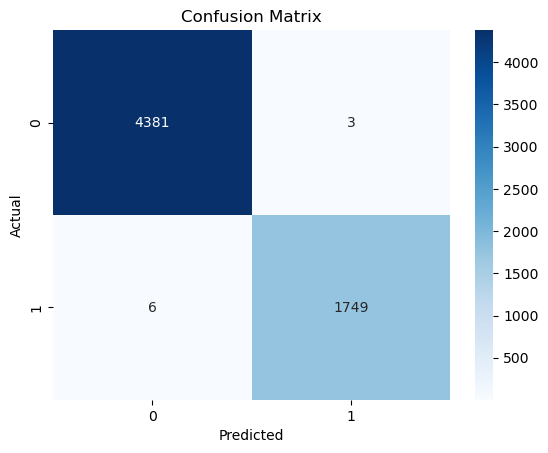

In [29]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [38]:
with open("app/New-Advanced-liver-sickness-detector.pkl","wb") as f:
    pickle.dump(model,f)

In [32]:
def make_predictions(data_filepath, model_filepath):
    # Wrangle compressed csv file with latin-1 encoding
    X_test = wrangle(data_filepath)
    # Load model
    with open(model_filepath,"rb") as f:
        model=pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "Result", and same index as X_test
    y_test_pred = pd.Series(y_test_pred,index=X_test.index,name="Result")
    return y_test_pred

In [33]:
y_test_pred = make_predictions(
    data_filepath="Data/Liver Patient Dataset (LPD)_train.csv.zip",
    model_filepath="Model/Advanced-liver-sickness-detector.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head(15)

predictions shape: (30691,)


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     2
9     1
10    1
11    1
12    2
13    1
14    1
Name: Result, dtype: int64

In [34]:
best_model = model.best_estimator_
classifier = best_model.named_steps['randomforestclassifier']
importances = classifier.feature_importances_

# Get feature names
preprocessor = best_model.named_steps['columntransformer']
feature_names = preprocessor.get_feature_names_out()

feat_imp = pd.Series(importances, index=feature_names).sort_values()

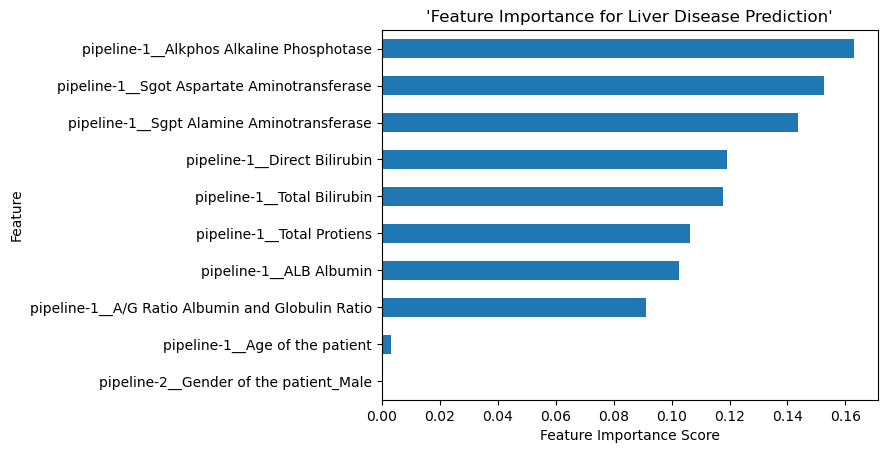

In [35]:
fig, ax = plt.subplots()

feat_imp.tail(10).plot(
    kind="barh",
    ax=ax
)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Feature")
ax.set_title("'Feature Importance for Liver Disease Prediction'")
plt.show();

In [36]:
import seaborn as sns

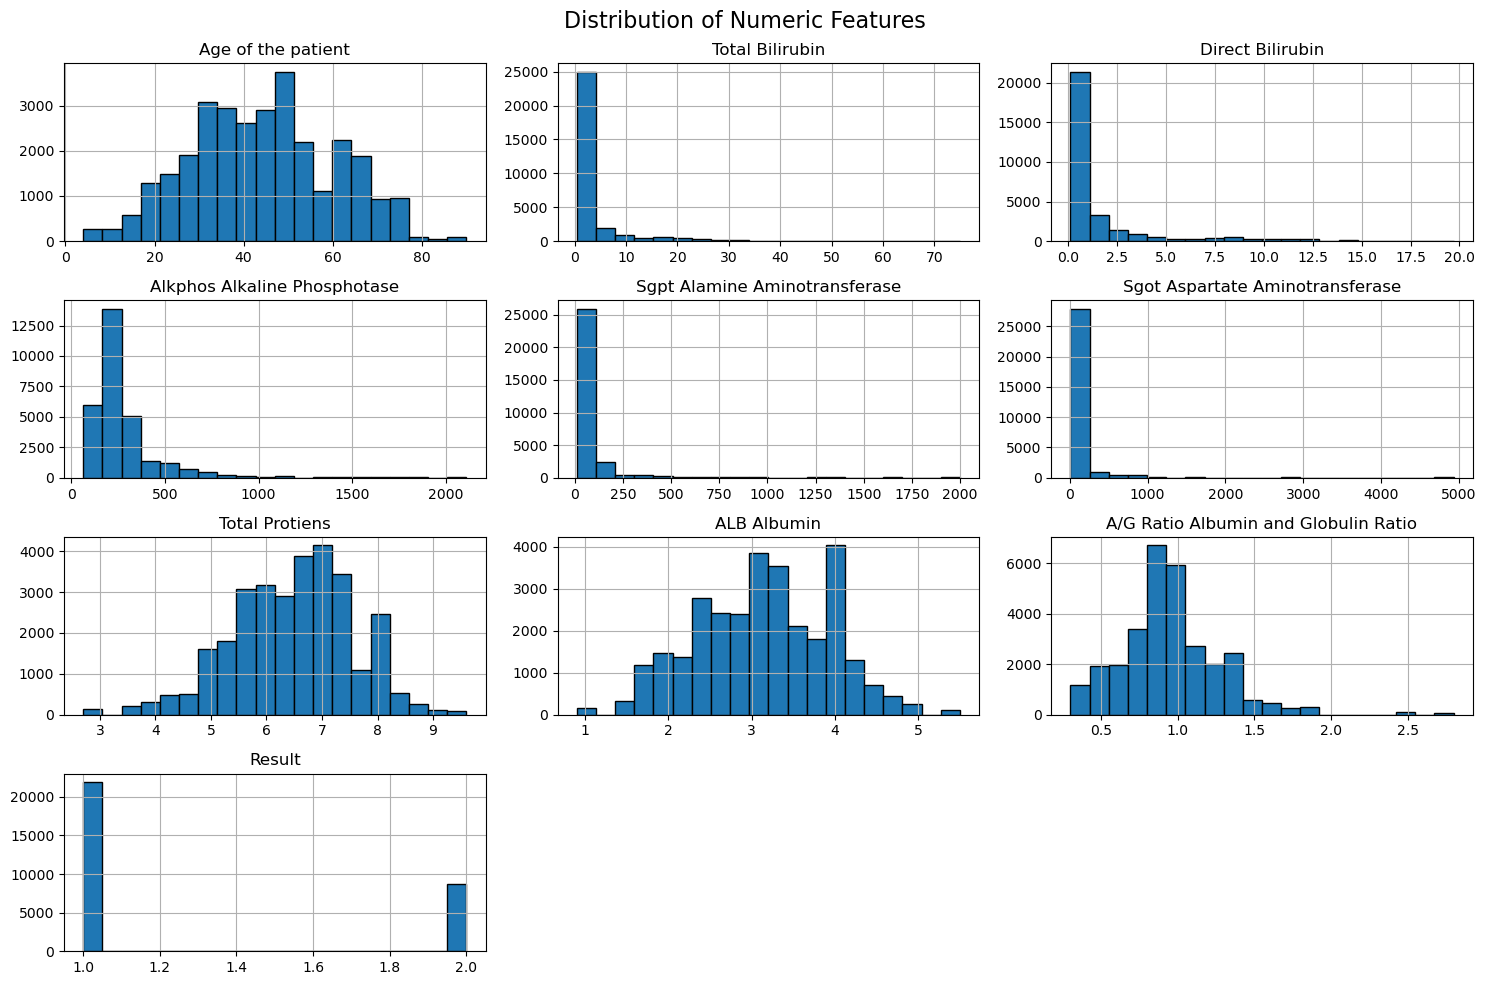

In [37]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(
    bins=20,
    figsize=(15, 10),
    edgecolor='black'
)

plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


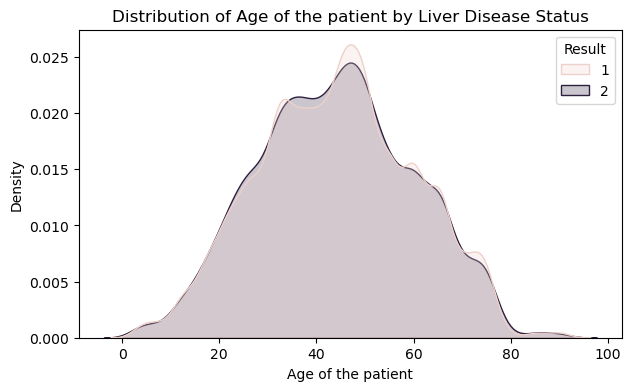

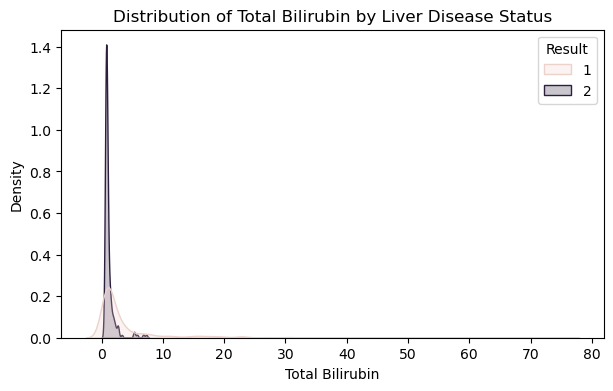

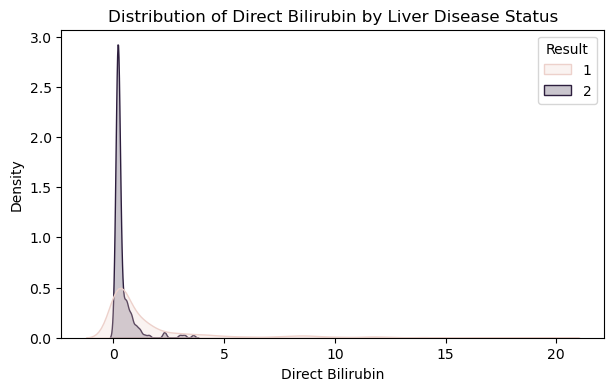

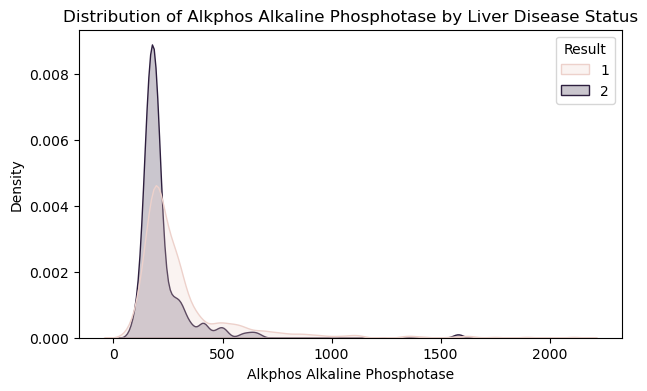

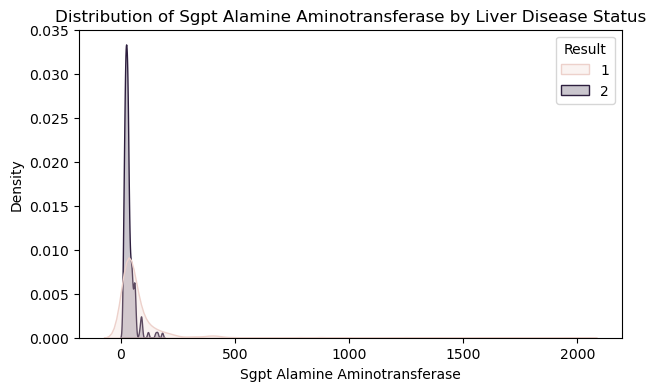

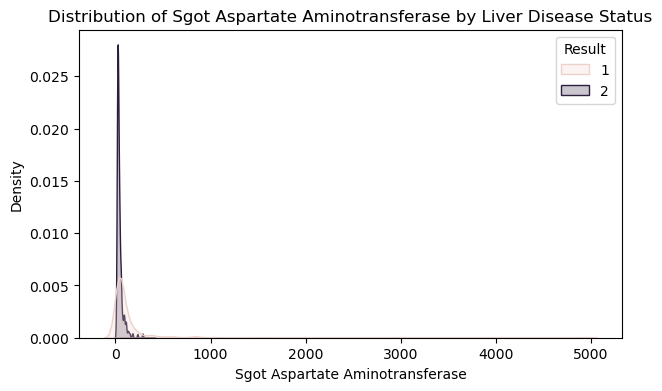

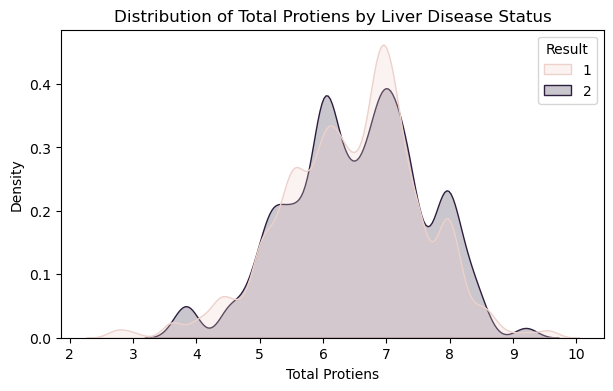

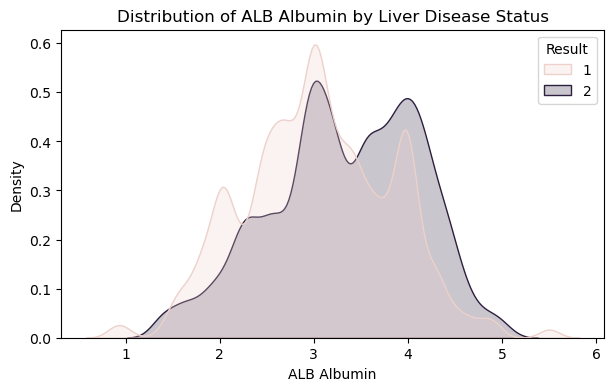

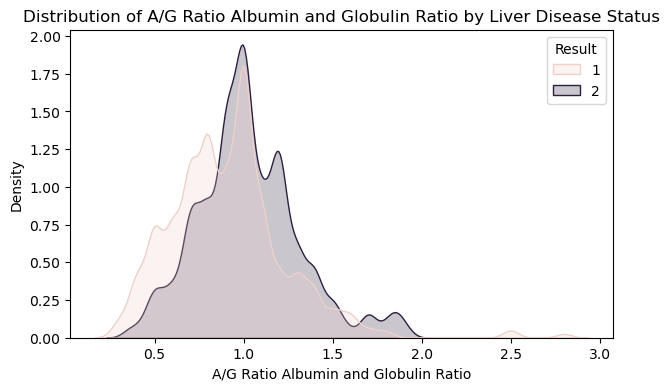

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7704\2626108913.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='Result', fill=True, common_norm=False)


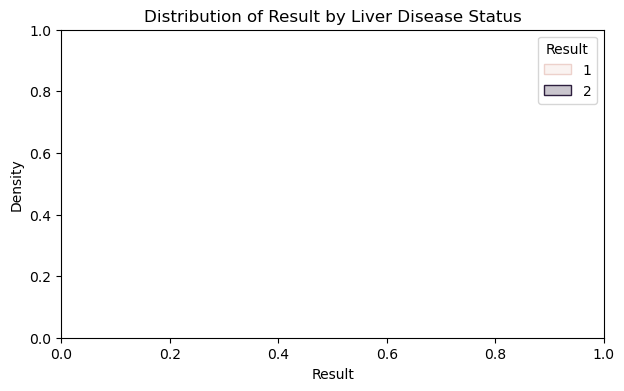

In [38]:
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.kdeplot(data=df, x=col, hue='Result', fill=True, common_norm=False)
    plt.title(f"Distribution of {col} by Liver Disease Status")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()



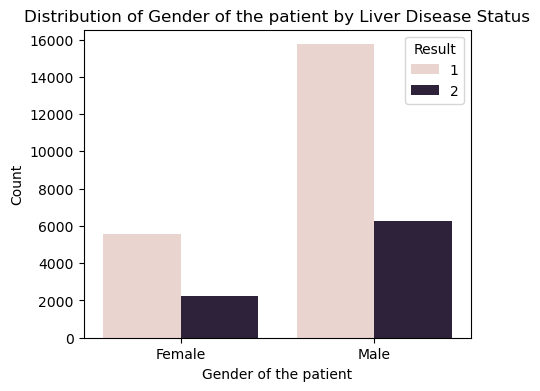

In [39]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=col, hue='Result')
    plt.title(f"Distribution of {col} by Liver Disease Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
